In [2]:
# Importing libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [3]:
# Reading datasets 
train_data = pd.read_excel("./datasets/Data_Train.xlsx")

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
# checking missing value
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
# Few missing values so, gone drop it
train_data.dropna(inplace=True)

In [7]:
# shape of datasets 
train_data.shape

(10682, 11)

In [8]:
# Rechecking missing value
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
# Checking datasets types and ML model only takes numerical values not charcter/string 
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [10]:
# Listing train_data columns 
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [11]:
# Changing object into datetime in (object dtypes but only where date time is necessary)
def change_into_datetime(col):
    train_data[col] = pd.to_datetime(train_data[col])

for col in['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(col)

In [12]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [13]:
# Converting yy--mm--dd to single d,M, Year we don't need
train_data['Journey_Day'] = train_data['Date_of_Journey'].dt.day
train_data['Journey_Month'] = train_data['Date_of_Journey'].dt.month

In [14]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-08-02 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-08-02 05:50:00,2024-08-02 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-08-02 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2024-08-02 18:05:00,2024-08-02 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2024-08-02 16:50:00,2024-08-02 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [15]:
# Now we can drop Date_of_Joutrney
train_data.drop('Date_of_Journey', axis=1, inplace=True)

In [16]:
# Coverting date into only hour and minute and dropping it Function
def extract_hour(df,col):
    df[col+"_hour"] = df[col].dt.hour

def extract_min(df,col):
    df[col+"_minute"] = df[col].dt.minute

def drop_column(df,col):
    df.drop(col,axis=1, inplace=True)

In [17]:
# Coverting Dep_Time into only hour and minute and dropping it 
extract_hour(train_data, "Dep_Time")
extract_min(train_data, "Dep_Time")
drop_column(train_data, "Dep_Time")

In [18]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-08-02 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2024-08-02 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2024-08-02 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50


In [19]:
# Coverting Arrival_Time into only hour and minute and dropping it 
extract_hour(train_data, "Arrival_Time")
extract_min(train_data, "Arrival_Time")
drop_column(train_data, "Arrival_Time")

In [20]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [21]:
train_data['Duration'][0].split(' ')

['2h', '50m']

In [22]:
# Pre processing Duration adding '0m' if there is no minute and adding '0h' if there is no hour
duration = list(train_data['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' ')) == 2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] ='0h ' + duration[i] 
train_data['Duration'] = duration

In [23]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [24]:
train_data['Duration'][0].split(' ')[0][0:-1]

'2'

In [25]:
# Accessing only hour and min value without h and m from duration
def hour(x):
    return x.split(' ')[0][0:-1]

def minute(x):
    return x.split(' ')[1][0:-1]

train_data['Duration_hours'] = train_data['Duration'].apply(hour)
train_data['Duration_minute'] = train_data['Duration'].apply(minute)

drop_column(train_data, 'Duration')

In [26]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_Day             int64
Journey_Month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours         object
Duration_minute        object
dtype: object

In [27]:
# Extracting numerical and categorical column data types 
cat_col = [col for col in train_data.columns if train_data[col].dtype == "O"]
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Total_Stops',
 'Additional_Info',
 'Duration_hours',
 'Duration_minute']

In [28]:
num_col = [col for col in train_data.columns if train_data[col].dtype != "O"]
num_col

['Price',
 'Journey_Day',
 'Journey_Month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute']

In [58]:
# Label Encoding 
categorical = train_data[cat_col]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration_hours,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,4,45


In [64]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [70]:
Airline = pd.get_dummies(categorical['Airline'], drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


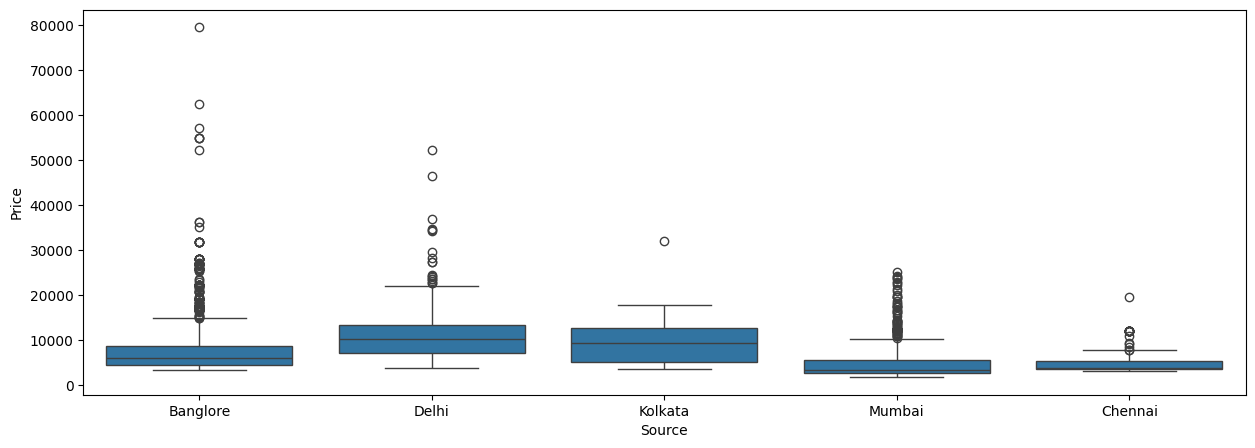

In [74]:
# Box plot of categorial Source and Price 
plt.figure(figsize=(15,5))
sns.boxplot(x='Source', y='Price', data=train_data.sort_values('Price', ascending=False))
source = pd.get_dummies(categorical['Source'], drop_first=True)
source.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


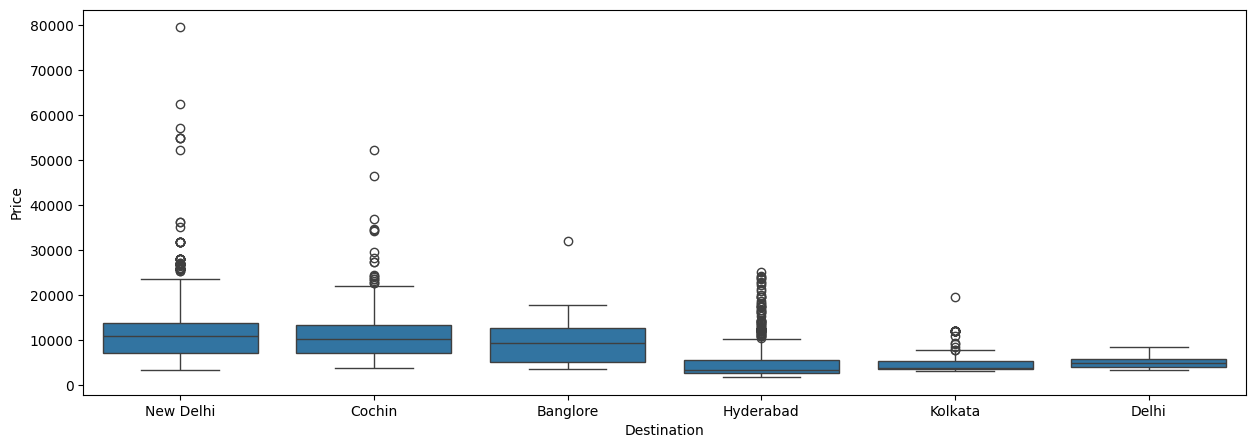

In [76]:
# Box plot of categorial desitination and Price 
plt.figure(figsize=(15,5))
sns.boxplot(x='Destination',y='Price', data=train_data.sort_values('Price',ascending=False))
Destination = pd.get_dummies(categorical['Destination'], drop_first=True)
Destination.head()

In [84]:
train_data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [88]:
categorical['Route_1'] = categorical['Route'].str.split('→').str[0]
categorical['Route_2'] = categorical['Route'].str.split('→').str[1]
categorical['Route_3'] = categorical['Route'].str.split('→').str[2]
categorical['Route_4'] = categorical['Route'].str.split('→').str[3]
categorical['Route_5'] = categorical['Route'].str.split('→').str[4]

drop_column(categorical,'Route')

/var/folders/2g/9_hmst594_72vjd1f22xng4w0000gn/T/ipykernel_1166/642281891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_1'] = categorical['Route'].str.split('→').str[0]
/var/folders/2g/9_hmst594_72vjd1f22xng4w0000gn/T/ipykernel_1166/642281891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Route_2'] = categorical['Route'].str.split('→').str[1]
/var/folders/2g/9_hmst594_72vjd1f22xng4w0000gn/T/ipykernel_1166/642281891.py:3: SettingWithCopyWarning: 
A value is trying t

In [90]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Duration_hours         0
Duration_minute        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [92]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Duration_hours', 'Duration_minute', 'Route_1', 'Route_2', 'Route_3',
       'Route_4', 'Route_5'],
      dtype='object')

In [94]:
for i in ['Route_3', 'Route_4', 'Route_5']:
    categorical[i].fillna('None', inplace=True)

for i in categorical.columns:
    print('{} has total {} categories'.format(i, len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Duration_hours has total 44 categories
Duration_minute has total 12 categories
Route_1 has total 5 categories
Route_2 has total 45 categories
Route_3 has total 30 categories
Route_4 has total 14 categories
Route_5 has total 6 categories


/opt/anaconda3/lib/python3.11/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [96]:
#  Label enconding usin scikit-learn
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categorical.columns
for i in['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
    categorical[i] = encoder.fit_transform(categorical[i])

categorical.head()

/var/folders/2g/9_hmst594_72vjd1f22xng4w0000gn/T/ipykernel_1166/4193978470.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i] = encoder.fit_transform(categorical[i])
/var/folders/2g/9_hmst594_72vjd1f22xng4w0000gn/T/ipykernel_1166/4193978470.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i] = encoder.fit_transform(categorical[i])
/var/folders/2g/9_hmst594_72vjd1f22xng4w0000gn/T/ipykernel_1166/4193978470.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

,Airline,Source,Destination,Total_Stops,Additional_Info,Duration_hours,Duration_minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,2,50,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,7,25,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,19,0,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,5,25,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,4,45,0,34,8,13,5


In [100]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [102]:
# Custome apporch of label encoder beacuse of less data to encode 
dict = {'non-stop':0, 
        '2 stops':2, 
        '1 stop':1, 
        '3 stops':3, 
        '4 stops':4
}
categorical['Total_Stops'] = categorical['Total_Stops'].map(dict)

/var/folders/2g/9_hmst594_72vjd1f22xng4w0000gn/T/ipykernel_1166/969417589.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Total_Stops'] = categorical['Total_Stops'].map(dict)


In [106]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Duration_hours,Duration_minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,No info,2,50,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,No info,7,25,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,No info,19,0,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,No info,5,25,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,No info,4,45,0,34,8,13,5


In [108]:
# concat categorical and numerical dataframe 
data_train = pd.concat([categorical,Airline,source,Destination,train_data[num_col]], axis=1)

In [110]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Duration_hours,Duration_minute,Route_1,Route_2,Route_3,...,Hyderabad,Kolkata,New Delhi,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,0,No info,2,50,0,13,29,...,0,0,1,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,2,No info,7,25,2,25,1,...,0,0,0,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,2,No info,19,0,3,32,4,...,0,0,0,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,1,No info,5,25,2,34,3,...,0,0,0,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,1,No info,4,45,0,34,8,...,0,0,1,13302,3,1,16,50,21,35


In [112]:
# Dropping Airline, Source, Destination
drop_column(data_train, 'Airline')
drop_column(data_train, 'Source')
drop_column(data_train, 'Destination')
drop_column(data_train, 'Additional_Info')

In [118]:
pd.set_option('display.max_columns', 35)
data_train.head()

,Total_Stops,Duration_hours,Duration_minute,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,0,2,50,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10
1,2,7,25,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15
2,2,19,0,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25
3,1,5,25,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30
4,1,4,45,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35


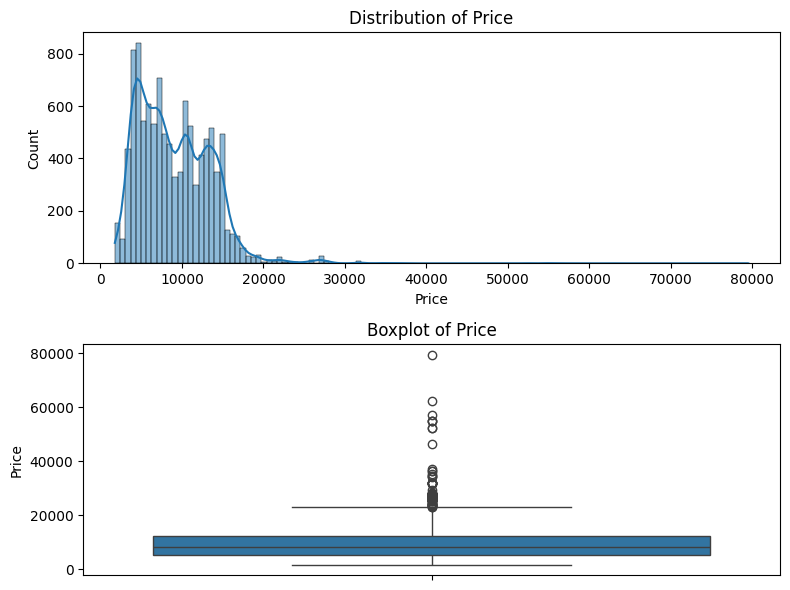

In [143]:
# Handling outliers 
def plot(df, col):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
    sns.histplot(df[col], ax=ax1, kde=True)
    sns.boxplot(df[col], ax=ax2)
    ax1.set_title(f'Distribution of {col}')
    ax2.set_title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

# Assuming data_train is already defined
plot(data_train, 'Price')

In [145]:
# Replacing outliers with median value
data_train['Price'] = np.where(data_train['Price']>= 40000, data_train['Price'].median(), data_train['Price'])

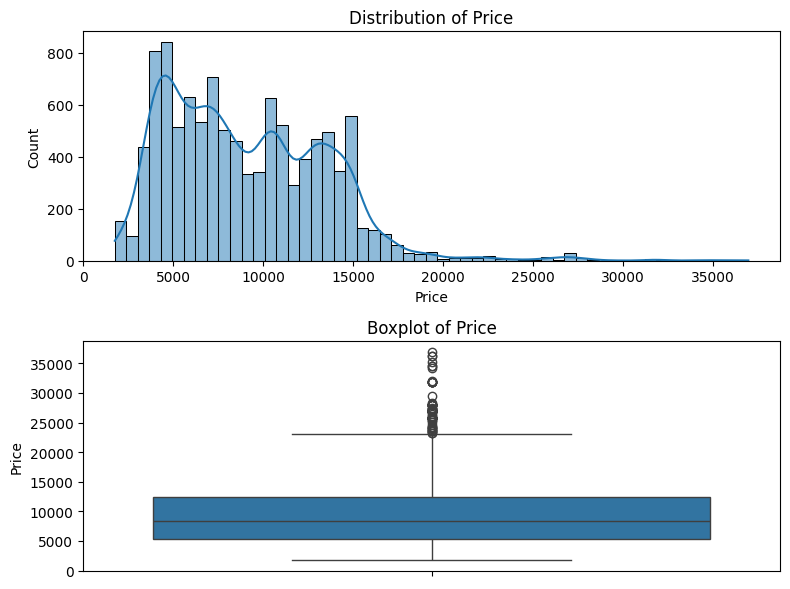

In [147]:
plot(data_train, 'Price')

In [154]:
data_train.columns

Index(['Total_Stops', 'Duration_hours', 'Duration_minute', 'Route_1',
       'Route_2', 'Route_3', 'Route_4', 'Route_5', 'Air India', 'GoAir',
       'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi', 'Price',
       'Journey_Day', 'Journey_Month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute'],
      dtype='object')

In [160]:
# Features and Target selection 
# Features
X = data_train.drop(columns=['Price'])
X.head()

,Total_Stops,Duration_hours,Duration_minute,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,0,2,50,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10
1,2,7,25,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15
2,2,19,0,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25
3,1,5,25,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30
4,1,4,45,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35


In [158]:
# Target
y= data_train['Price']
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

In [163]:
# Less features importance or selecting best features 
from sklearn.feature_selection import mutual_info_classif
mutual_info_classif(X,y)

array([1.91703017e+00, 1.77063646e+00, 1.15307682e+00, 2.33246364e+00,
       2.99888207e+00, 2.54801497e+00, 1.68718211e+00, 1.46166759e+00,
       6.80632659e-01, 8.92760860e-02, 6.25784609e-01, 9.02133169e-01,
       5.21300237e-03, 5.38532512e-01, 1.60295841e-03, 3.05029095e-01,
       0.00000000e+00, 1.91360315e-01, 6.38880390e-03, 1.67131524e-01,
       1.38020721e+00, 8.24814174e-01, 2.74122462e-01, 1.38633053e+00,
       4.25314347e-01, 2.70723431e-01, 1.62605355e-01, 3.49622333e-01,
       1.23607492e+00, 1.08542109e+00, 1.49154131e+00, 1.27996591e+00,
       1.88104289e+00, 1.63970757e+00])

In [167]:
important = pd.DataFrame(mutual_info_classif(X,y), index=X.columns)
important
important.columns = ['importance']
important.sort_values(by = 'importance', ascending=False)

,importance
Route_2,2.990401
Route_3,2.572608
Route_1,2.299209
Total_Stops,1.953767
Arrival_Time_hour,1.907833
Duration_hours,1.756775
Route_4,1.696419
Arrival_Time_minute,1.653484
Dep_Time_hour,1.507710
Route_5,1.443138


In [170]:
# You can remove Truject because of less importance 

In [ ]:
#  ML Algorithm Selection